Let $G$ be a connected $r$-regular graph with $k$ vertices, and let $r=\displaystyle \lambda _{1}\geq \lambda_{2}\geq \cdots \geq \lambda_{n}$ be the eigenvalues of the adjacency matrix of $G$.  Since $G$ is connected and $r$-regular, its eigenvalues satisfy 
$$ |\lambda_i| \leq r, 1 \leq i \leq n. $$
Let 
$$ \lambda (G)=\max_{|\lambda_i|<r}|\lambda_{i}|. $$
The graph $G$ is a Ramanujan graph if  
$$ \lambda (G)\leq 2{\sqrt {r -1}}. $$


In this file, we generate some data to investigate the following question: which ring graph $R(N,k)$ is Ramanujan? 

In [117]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from numpy import savetxt
from numpy.linalg import eig
import json

In [31]:
def complete_graph(n):
    g=nx.empty_graph()
    for i in range(0,n):
        for j in range(0, n):
            if i !=j: 
                g.add_edge(i,j)
    return g      

def ring_graph(N,k):
    if 2*k >=N-1:
        return complete_graph(N)
    g = nx.empty_graph(N)
    for i in range(0,N):
        for j in range(0,N):
            if (i-j)% N !=0 and (i-j)%N <=k:
                g.add_edge(i,j)
    return g            
               

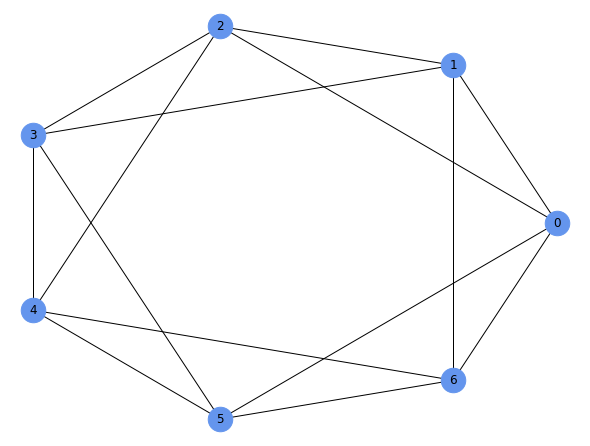

In [32]:
# Ring graph for N=7, k =2
fig = plt.gcf()
fig.set_size_inches(8,6)
N=7
k=2
g = ring_graph(N,k)
pos = nx.circular_layout(g)
nx.draw(g, pos=pos,
       with_labels = True,
                node_size = 600,
                 scale = 2,
                node_color = '#6495ED')


Let $N$ be a fixed positive integer. Then $R(N,k)$ is the complete graph if $2k \geq N$ which is Ramanujan. So, there exists an integer $k_0$ (depending on $N$) such that if $k \geq k_0$ then $R(N,k)$ is Ramanujan. 

Question: What is the size of $k_0$ relative to $N$? 

In [76]:
def spectrum_ring_graph(N,k):
    g= ring_graph(N,k)
    A = nx.adjacency_matrix(g)
    w,v=eig(A.todense())
    sorted_w = sorted(w, reverse= True)
    return sorted_w
    

def is_ramanujan(N,k):
    g= ring_graph(N,k)
    A = nx.adjacency_matrix(g)
    w,v=eig(A.todense())
    sorted_w = sorted(w, reverse= True)
    r= 2*k 
    for eigenvalue in sorted_w[1:]:
        if eigenvalue**2>4*(r-1):
            return False
    return True

def smallest_k(N):
    ramanujan_test =[]
    for k in range(1, N//2):
        ramanujan_test.append(is_ramanujan(N,k))
    #print(ramanujan_test)    
    range_k = len(ramanujan_test)
    for k in range(range_k):
        if sum(ramanujan_test[k:]) == len(ramanujan_test[k:]):
            return [N,k+1]        

In [77]:
N=7
k=2
is_ramanujan(N,k)

True

In [78]:
N=27
result = smallest_k(N)
print(result)

[27, 8]


In [79]:
N=28
result = smallest_k(N)
print(result)

[28, 8]


In [80]:
N=29
result = smallest_k(N)
print(result)

[29, 9]


In [89]:
pairs = []
for N in range(5, 300):
    pairs.append(smallest_k(N))
print(pairs)    

[[5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 2], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 2], [17, 1], [18, 2], [19, 4], [20, 5], [21, 5], [22, 6], [23, 6], [24, 6], [25, 7], [26, 7], [27, 8], [28, 8], [29, 9], [30, 9], [31, 10], [32, 10], [33, 10], [34, 11], [35, 11], [36, 12], [37, 12], [38, 13], [39, 13], [40, 13], [41, 14], [42, 14], [43, 15], [44, 15], [45, 16], [46, 16], [47, 16], [48, 17], [49, 17], [50, 18], [51, 18], [52, 19], [53, 19], [54, 20], [55, 20], [56, 20], [57, 21], [58, 21], [59, 22], [60, 22], [61, 23], [62, 23], [63, 23], [64, 24], [65, 24], [66, 25], [67, 25], [68, 26], [69, 26], [70, 27], [71, 27], [72, 27], [73, 28], [74, 28], [75, 29], [76, 29], [77, 30], [78, 30], [79, 31], [80, 31], [81, 31], [82, 32], [83, 32], [84, 33], [85, 33], [86, 34], [87, 34], [88, 35], [89, 35], [90, 36], [91, 36], [92, 36], [93, 37], [94, 37], [95, 38], [96, 38], [97, 39], [98, 39], [99, 40], [100, 40], [101, 40], [102, 41], [103, 41], [104, 42], [105, 42], [106, 43], [10

In [93]:
for N in range(300, 400):
    pairs.append(smallest_k(N))
print(pairs)  

[[5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 2], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 2], [17, 1], [18, 2], [19, 4], [20, 5], [21, 5], [22, 6], [23, 6], [24, 6], [25, 7], [26, 7], [27, 8], [28, 8], [29, 9], [30, 9], [31, 10], [32, 10], [33, 10], [34, 11], [35, 11], [36, 12], [37, 12], [38, 13], [39, 13], [40, 13], [41, 14], [42, 14], [43, 15], [44, 15], [45, 16], [46, 16], [47, 16], [48, 17], [49, 17], [50, 18], [51, 18], [52, 19], [53, 19], [54, 20], [55, 20], [56, 20], [57, 21], [58, 21], [59, 22], [60, 22], [61, 23], [62, 23], [63, 23], [64, 24], [65, 24], [66, 25], [67, 25], [68, 26], [69, 26], [70, 27], [71, 27], [72, 27], [73, 28], [74, 28], [75, 29], [76, 29], [77, 30], [78, 30], [79, 31], [80, 31], [81, 31], [82, 32], [83, 32], [84, 33], [85, 33], [86, 34], [87, 34], [88, 35], [89, 35], [90, 36], [91, 36], [92, 36], [93, 37], [94, 37], [95, 38], [96, 38], [97, 39], [98, 39], [99, 40], [100, 40], [101, 40], [102, 41], [103, 41], [104, 42], [105, 42], [106, 43], [10

In [97]:
for N in range(400, 500):
    pairs.append(smallest_k(N))
print(pairs)  

[[5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 2], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 2], [17, 1], [18, 2], [19, 4], [20, 5], [21, 5], [22, 6], [23, 6], [24, 6], [25, 7], [26, 7], [27, 8], [28, 8], [29, 9], [30, 9], [31, 10], [32, 10], [33, 10], [34, 11], [35, 11], [36, 12], [37, 12], [38, 13], [39, 13], [40, 13], [41, 14], [42, 14], [43, 15], [44, 15], [45, 16], [46, 16], [47, 16], [48, 17], [49, 17], [50, 18], [51, 18], [52, 19], [53, 19], [54, 20], [55, 20], [56, 20], [57, 21], [58, 21], [59, 22], [60, 22], [61, 23], [62, 23], [63, 23], [64, 24], [65, 24], [66, 25], [67, 25], [68, 26], [69, 26], [70, 27], [71, 27], [72, 27], [73, 28], [74, 28], [75, 29], [76, 29], [77, 30], [78, 30], [79, 31], [80, 31], [81, 31], [82, 32], [83, 32], [84, 33], [85, 33], [86, 34], [87, 34], [88, 35], [89, 35], [90, 36], [91, 36], [92, 36], [93, 37], [94, 37], [95, 38], [96, 38], [97, 39], [98, 39], [99, 40], [100, 40], [101, 40], [102, 41], [103, 41], [104, 42], [105, 42], [106, 43], [10

In [123]:
for N in range(500, 600):
    pairs.append(smallest_k(N))
print(pairs) 

[[5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 2], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 2], [17, 1], [18, 2], [19, 4], [20, 5], [21, 5], [22, 6], [23, 6], [24, 6], [25, 7], [26, 7], [27, 8], [28, 8], [29, 9], [30, 9], [31, 10], [32, 10], [33, 10], [34, 11], [35, 11], [36, 12], [37, 12], [38, 13], [39, 13], [40, 13], [41, 14], [42, 14], [43, 15], [44, 15], [45, 16], [46, 16], [47, 16], [48, 17], [49, 17], [50, 18], [51, 18], [52, 19], [53, 19], [54, 20], [55, 20], [56, 20], [57, 21], [58, 21], [59, 22], [60, 22], [61, 23], [62, 23], [63, 23], [64, 24], [65, 24], [66, 25], [67, 25], [68, 26], [69, 26], [70, 27], [71, 27], [72, 27], [73, 28], [74, 28], [75, 29], [76, 29], [77, 30], [78, 30], [79, 31], [80, 31], [81, 31], [82, 32], [83, 32], [84, 33], [85, 33], [86, 34], [87, 34], [88, 35], [89, 35], [90, 36], [91, 36], [92, 36], [93, 37], [94, 37], [95, 38], [96, 38], [97, 39], [98, 39], [99, 40], [100, 40], [101, 40], [102, 41], [103, 41], [104, 42], [105, 42], [106, 43], [10

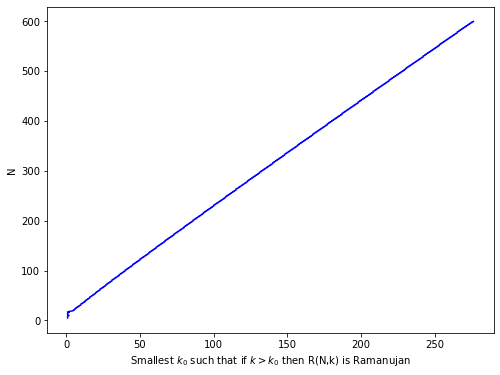

In [124]:
fig = plt.gcf()
fig.set_size_inches(8,6)
x = [pair[1] for pair in pairs]
y = [pair[0] for pair in pairs]
plt.plot(x, y, color='blue')
plt.xlabel('Smallest '+ r'$k_0$' + ' such that if '+ r'$k>k_0$'+ ' then R(N,k) is Ramanujan')
plt.ylabel('N')
plt.savefig("smallest_k.png", dpi =300)
plt.show()


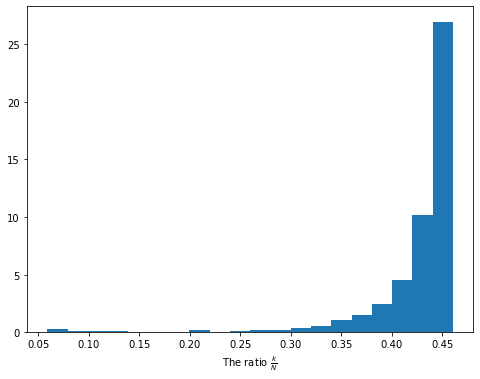

In [125]:
fig = plt.gcf()
fig.set_size_inches(8,6)
ratio = [pair[1]/pair[0] for pair in pairs]
plt.hist(ratio, density=True, bins=20)
plt.xlabel(f"The ratio " + r'$\frac{k}{N}$')
plt.savefig("the_ratio_k_over_N.png", dpi =300)
plt.show()

In [126]:
with open("ring_graph_data.json", "w") as output_file:
    json.dump(pairs, output_file)

In [127]:
with open("ring_graph_data.json") as input_data:
    data = json.load(input_data)

In [128]:
data[0]

[5, 1]

In [129]:
max(ratio)

0.4607679465776294

In [131]:
big_N = [700, 1000, 1500, 2000]
for N in big_N:
    pairs.append(smallest_k(N))
ratio = [pair[1]/pair[0] for pair in pairs]
print(max(ratio))    

0.478


In [ ]:
print(ratio[-1])